In [34]:
## plot a vector field using Gnuplot and Makie 
using Gnuplot
using Statistics
using Makie
using CairoMakie

Gnuplot.options.mime[MIME"text/html"] = "svg enhanced standalone mouse size 400,400"

"svg enhanced standalone mouse size 400,400"

In [12]:
# calculate some dummy data
xs = LinRange(0, 2pi, 20)
ys = LinRange(0, 3pi, 20)
us = [sin(x) * cos(y) for x in xs, y in ys]
vs = [-cos(x) * sin(y) for x in xs, y in ys]
strength = vec(sqrt.(us .^ 2 .+ vs .^ 2));

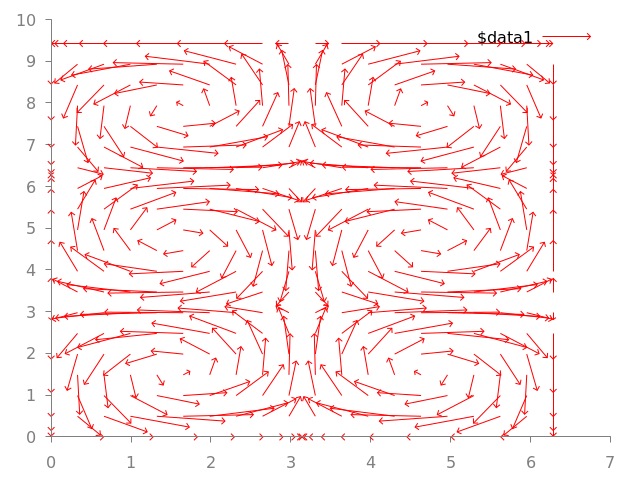

In [24]:
@gp "reset"

# noborder.cfg
@gp :- "set border 0"
@gp :- "set style line 101 lc rgb '#808080' lt 1 lw 1"
@gp :- "unset xlabel"
@gp :- "unset ylabel"
@gp :- "set format x ''"
@gp :- "set format y ''"
@gp :- "set tics scale 0"

# xyborder.cfg
@gp :- "set style line 101 lc rgb '#808080' lt 1 lw 1"
@gp :- "set border 3 front ls 101"
@gp :- "set tics nomirror out scale 0.75"
@gp :- "set format '%g'"

@gp :- xs ys us vs "with vectors head size 0.06,45,20 lw 1 lc rgb 'red'"
#@gp :- xs ys us vs strength "with vectors head size 0.06,45,20 lw 0.4 lc variable"
# the fifth column is the color column encoded in variable, but dosn't work


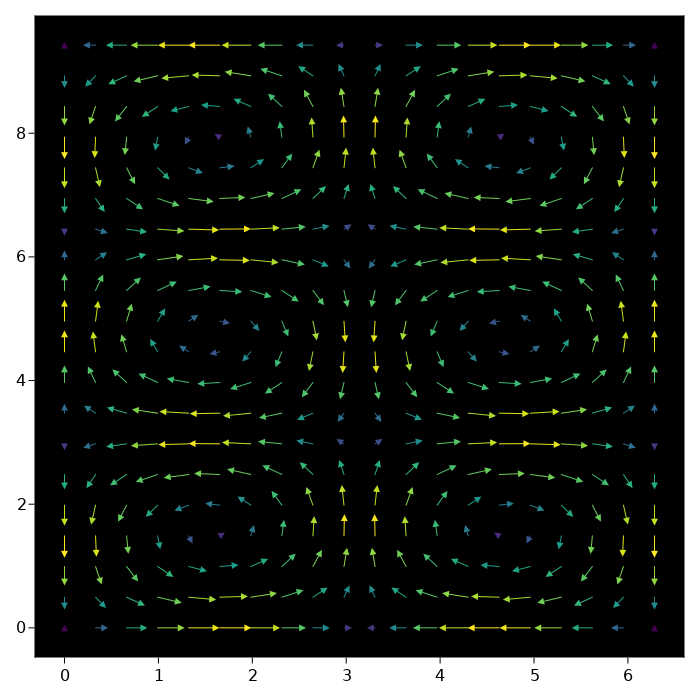

In [36]:
## Makie.jl code 
f = Figure(resolution = (700, 700))
Axis(f[1, 1], backgroundcolor = "black")
as = arrows!(xs, ys, us, vs, lengthscale = 0.3,
    arrowcolor = strength, linecolor = strength)
f